In [1]:
from IPython.display import display
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import msreport

sys.path.append("..")
from python_scripts import ticplot

In [2]:
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["font.family"] = "Arial"

## Define parameters, load mzml files

In [3]:
# Define parameters
qtable_dir = "../qtable_data"
qtable_basename = "GFP-Atg8_trypsin_untreated"
output_dir = "../plots/figure_1"

In [4]:
# Read qtable
qtable = msreport.Qtable.load(qtable_dir, qtable_basename)
# qtable.set_expression_by_tag("iBAQ intensity", log2=True)

## Plot figures

In [5]:
figname = "protein_abundance_plot.pdf"
figpath = os.path.join(output_dir, figname)

colors = {
    "GFP-Nanobody": "#E73C40",
    "ATG8": "#40B7B5",
    "Yeast protein": "#025a77",
    "Trypsin": "#025a77",  # "#808080",
}
colors_light = {
    "GFP-Nanobody": "#f18a8c",
    "ATG8": "#8ad6d5",
    "Yeast protein": "#03779d",
    "Trypsin": "#03779d",  # "#B0B0B0",
}

In [6]:
# Sort values according to intensity
data = qtable.data.sort_values("Expression GFP_Atg8", ascending=False).reset_index()

# Select which proteins will be displayed
mask = data["Gene name"] == "ATG8"
mask[0:10] = True

# Change gene names of proteins
data.loc[data["Gene name"] == "GFPNanobody", "Gene name"] = data["Protein name"][data["Gene name"] == "GFPNanobody"]
data.loc[data["Protein name"] == "Trypsin", "Gene name"] = data["Protein name"][data["Protein name"] == "Trypsin"]
data.loc[[1, 3, 4, 5, 6, 7, 8, 9], "Gene name"] = "Yeast protein"

# Define colors for each protein
data = data.loc[mask, ["Gene name", "Expression GFP_Atg8"]]
data["Colors"] = [colors[gn] for gn in data["Gene name"]]
data["Colors light"] = [colors_light[gn] for gn in data["Gene name"]]

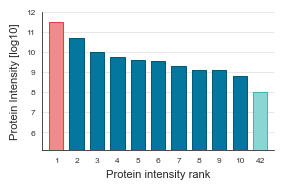

In [7]:
bar_width = 0.7
ylim = (5.1, 12)
xlim = (-bar_width, 10 + bar_width)

y = np.log10(np.power(2, data["Expression GFP_Atg8"]))
x = [j for j, i in enumerate(y)]

xticklabels = [i + 1 for i in data.index]

# Plot data
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(3, 1.8))

ax.bar(
    x,
    y,
    width=bar_width,
    align="center",
    edgecolor="None",
    color=data["Colors light"],
)
ax.bar(
    x,
    y,
    width=bar_width,
    align="center",
    edgecolor=data["Colors"],
    color="None",
    lw=0.75,
)

# Ticks
ax.set_yticks(range(13))
ax.set_xticks(range(len(x)))
ax.set_xticklabels(xticklabels)
ax.tick_params(
    which="major",
    direction="out",
    length=1.5,
    width=0.3,
    colors="#333333",
    top=False,
    right=False,
    bottom=False,
    labelsize=6,
)

# Spines
sns.despine(right=True, top=True, left=False, bottom=False)
for spine in ax.spines.values():
    spine.set_color("#000000")
    spine.set_linewidth(0.5)
# ax.spines["bottom"].set_position(("outward", 5))

# Axis labels
ax.set_xlabel("Protein intensity rank", fontsize=8)
ax.set_ylabel("Protein Intensity [log10]", fontsize=8)

# Adjust grind lines
ax.yaxis.grid(
    which="both",
    linestyle="solid",
    lw=0.5,
    alpha=1,
    color="#DDDDDD",
    zorder=0,
)
ax.xaxis.grid(False, which="both")

# Plot limits
ax.set_ylim(ylim)
ax.set_xlim(xlim)

fig.savefig(figpath, dpi=300)